<a href="https://colab.research.google.com/github/julmoram/TelcomX_LATAM/blob/main/TelecomX_LATAM_correccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [2]:
#Cargar importaciones
import pandas as pd
import json
import requests

In [3]:
#Abrir el google drive para traer el archivo de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Cargar el URl
url = '/content/drive/MyDrive/TelecomX_Data.json'

In [27]:
df = pd.read_json(url)

In [28]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [29]:
# Mostrar nombres de columnas y tipos de datos
print("Columnas del dataset:")
print(df.columns)

print("\nTipos de datos:")
print(df.dtypes)


Columnas del dataset:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [30]:
# Columna Base:
df_main = df[['Churn']]

# Columnas del diccionario 'customer'
df_customer = df['customer'].apply(pd.Series)[['SeniorCitizen', 'tenure']]

# Columnas del diccionario 'phone'
df_phone = df['phone'].apply(pd.Series)[['PhoneService', 'MultipleLines']]

# Columnas del diccionario 'internet'
df_internet = df['internet'].apply(pd.Series)[[
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]]

# Columnas del diccionario 'account'
df_account = df['account'].apply(pd.Series)[['Contract', 'PaperlessBilling', 'PaymentMethod']]

# Columnas del diccionario 'Charges' dentro del diccionario 'account'
df_charges = df['account'].apply(lambda x: x['Charges']).apply(pd.Series)[['Monthly', 'Total']]

# DataFrame global
df_flat = pd.concat([df_main, df_customer, df_phone, df_internet, df_account, df_charges], axis=1)
df_flat

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,No,0,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,0,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,0,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,1,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,1,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,0,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,0,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,0,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,0,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [32]:
for col in df_flat.columns:
    print(f"\n{col}")
    print("Valores únicos:", df_flat[col].unique())
    print("Valores nulos:", df_flat[col].isna().sum())
    print("Espacios vacíos:", (df_flat[col] == ' ').sum())


Churn
Valores únicos: ['No' 'Yes' '']
Valores nulos: 0
Espacios vacíos: 0

SeniorCitizen
Valores únicos: [0 1]
Valores nulos: 0
Espacios vacíos: 0

tenure
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Valores nulos: 0
Espacios vacíos: 0

PhoneService
Valores únicos: ['Yes' 'No']
Valores nulos: 0
Espacios vacíos: 0

MultipleLines
Valores únicos: ['No' 'Yes' 'No phone service']
Valores nulos: 0
Espacios vacíos: 0

InternetService
Valores únicos: ['DSL' 'Fiber optic' 'No']
Valores nulos: 0
Espacios vacíos: 0

OnlineSecurity
Valores únicos: ['No' 'Yes' 'No internet service']
Valores nulos: 0
Espacios vacíos: 0

OnlineBackup
Valores únicos: ['Yes' 'No' 'No internet service']
Valores nulos: 0
Espacios vacíos: 0

DeviceProtection
Valores únicos: ['No' 'Yes' 'No internet service']
Valores nulos: 0
Espa

In [18]:
import warnings

warnings.filterwarnings('ignore')

In [33]:
# Copia del df_flat para su modificación segura
df_clean = df_flat.copy()

# Convierte a binario
cols_bin = [
    'Churn', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]
df_clean[cols_bin] = df_clean[cols_bin].replace({'Yes': 1, 'No': 0})

In [34]:
# Verificación de NaN y espacios vacíos
cols_verif = [
    'Churn', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Monthly', 'Total'
]
errores = {}

for col in cols_verif:
    prueba = pd.to_numeric(df_clean[col], errors='coerce')
    resultado = prueba.isna()
    if resultado.any():
        errores[col] = df_clean.loc[resultado, col].value_counts()

for col, vals in errores.items():
    print(vals)


Churn
    224
Name: count, dtype: int64
MultipleLines
No phone service    707
Name: count, dtype: int64
OnlineSecurity
No internet service    1581
Name: count, dtype: int64
OnlineBackup
No internet service    1581
Name: count, dtype: int64
DeviceProtection
No internet service    1581
Name: count, dtype: int64
TechSupport
No internet service    1581
Name: count, dtype: int64
StreamingTV
No internet service    1581
Name: count, dtype: int64
StreamingMovies
No internet service    1581
Name: count, dtype: int64
Total
    11
Name: count, dtype: int64


In [35]:
# Elimina las rows con registros vacíos en 'Churn' o 'Total'
df_clean = df_clean.astype({'Churn': str, 'Total': str})
df_clean.drop(df_clean[(df_clean['Churn'].str.strip() == '') | (df_clean['Total'].str.strip() == '')].index, inplace=True)

# Reemplaza STR por binario (0)
df_clean.replace({'No phone service': 0, 'No internet service': 0}, inplace=True)

# Convierte a float
df_clean = df_clean.astype({'Monthly': float, 'Total': float})
# Vuelve a convertir a int64, luego de borrar los registros vacíos
df_clean['Churn'] = df_clean['Churn'].astype('int64')
# Convierte a str con lower case
cols_str = ['InternetService', 'Contract', 'PaymentMethod']
for col in cols_str:
    df_clean[col] = df_clean[col].astype(str).str.lower()

datos = df_clean.copy()
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   int64  
 4   MultipleLines     7032 non-null   int64  
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  StreamingTV       7032 non-null   int64  
 11  StreamingMovies   7032 non-null   int64  
 12  Contract          7032 non-null   object 
 13  PaperlessBilling  7032 non-null   int64  
 14  PaymentMethod     7032 non-null   object 
 15  Monthly           7032 non-null   float64
 16  Total             7032 non-null   float64
dtype

In [40]:
datos['Cuentas_Diarias'] = (datos['Monthly'] / 30).round(2)
datos.head()

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0,0,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,1,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46
3,1,1,13,1,0,fiber optic,0,1,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.27
4,1,1,3,1,0,fiber optic,0,0,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [41]:
datos.describe()

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Monthly,Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159891
std,0.441782,0.368844,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002955
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.187500
50%,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,0.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.992500
max,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [42]:
# Estadísticas en variables binarias
cols_bin = [
    'Churn', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]
print("Media de:")
print(datos[cols_bin].mean().round(2).sort_values())

# Estadística en variables numéricas
cols_num = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']
print("\nValores estadísticos de:")
print(datos[cols_num].describe().drop(index='count').round(2))

# Estadística en variables str
cols_str = ['InternetService', 'Contract', 'PaymentMethod']
print("\nDistribución de valores por variable str:")
for col in cols_str:
    print(f"\n{datos[col].value_counts(normalize=True).round(2)}")

Media de:
SeniorCitizen       0.16
Churn               0.27
TechSupport         0.29
OnlineSecurity      0.29
OnlineBackup        0.34
DeviceProtection    0.34
StreamingTV         0.38
StreamingMovies     0.39
MultipleLines       0.42
PaperlessBilling    0.59
PhoneService        0.90
dtype: float64

Valores estadísticos de:
      tenure  Monthly    Total  Cuentas_Diarias
mean   32.42    64.80  2283.30             2.16
std    24.55    30.09  2266.77             1.00
min     1.00    18.25    18.80             0.61
25%     9.00    35.59   401.45             1.19
50%    29.00    70.35  1397.48             2.34
75%    55.00    89.86  3794.74             2.99
max    72.00   118.75  8684.80             3.96

Distribución de valores por variable str:

InternetService
fiber optic    0.44
dsl            0.34
no             0.22
Name: proportion, dtype: float64

Contract
month-to-month    0.55
two year          0.24
one year          0.21
Name: proportion, dtype: float64

PaymentMethod
electronic

In [44]:
datos['Cuentas_Diarias'] = (datos['Monthly'] / 30).round(2)
datos.head()


,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0,0,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,1,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46
3,1,1,13,1,0,fiber optic,0,1,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.27
4,1,1,3,1,0,fiber optic,0,0,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.80


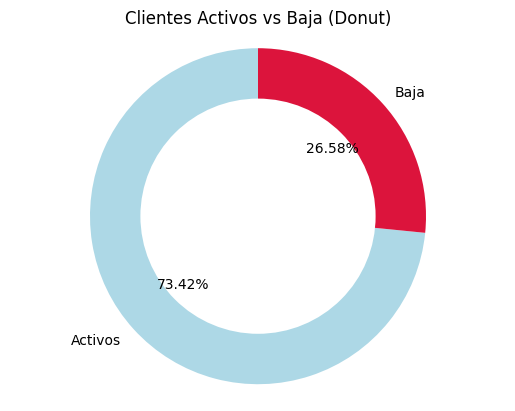

In [48]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(churn_total, labels=['Activos', 'Baja'],
                                  autopct='%1.2f%%', startangle=90,
                                  colors=['lightblue', 'crimson'])

# Dibujar círculo blanco en el centro para simular "dona"
centro = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centro)

plt.title('Clientes Activos vs Baja (Donut)')
plt.axis('equal')
plt.show()


In [51]:
# Crear una lista de dictionarios para graficar
grafico = []
cols_to_plot = ['InternetService', 'Contract', 'PaymentMethod'] # Add other categorical columns you want to plot

for col in cols_to_plot:
    churn_rate = datos.groupby(col)['Churn'].mean().reset_index()
    grafico.append({
        "x": churn_rate[col],
        "y": churn_rate['Churn'],
        "color": 'blue',
        "col": col
    })
media_churn = datos['Churn'].mean()

In [52]:
import plotly.graph_objects as go
fig = go.Figure()

for i, barra in enumerate(grafico):
    visible = True if i == 0 else False
    fig.add_trace(go.Scatter(
        x=barra["x"],
        y=barra["y"],
        mode='markers',
        marker=dict(color=barra["color"], size=15),
        name=barra["col"],
        visible=visible
    ))

# Línea horizontal: media de churn
fig.add_shape(
    type="line",
    x0=-0.5,
    x1=len(grafico[0]['x']),
    y0=media_churn,
    y1=media_churn,
    line=dict(color="gray", dash="dash")
)

# Menú desplegable para cambiar de categoría
menu_desp = []
for i, barra in enumerate(grafico):
    visibility = [False] * len(grafico)
    visibility[i] = True
    menu_desp.append(dict(label=barra["col"], method="update",
                          args=[{"visible": visibility},
                                {"title": f"Tasa de baja según {barra['col']}"}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=menu_desp, x=1.1)],
    yaxis=dict(title="Proporción de baja", range=[0, 1]),
    xaxis=dict(title="Categoría"),
    title=f"Tasa de baja según {grafico[0]['col']}",
    height=400
)

fig.show()

In [54]:
import plotly.graph_objects as go

# Paso 1: Preparar los datos
cols_bin_filtradas = [col for col in cols_bin if col != 'Churn']
media_churn = datos['Churn'].mean()
barras_bin = []

for col in cols_bin_filtradas:
    churn_cat = datos.groupby(col)['Churn'].mean()
    categorias = ['No' if i == 0 else 'Sí' for i in churn_cat.index]
    valores = churn_cat.values
    colores = ['crimson' if val > media_churn else 'lightgray' for val in valores]

    barras_bin.append({
        "x": categorias,
        "y": valores,
        "color": colores,
        "col": col
    })

# Paso 2: Crear la figura interactiva con scatter
fig = go.Figure()

for i, barra in enumerate(barras_bin):
    visible = True if i == 0 else False
    fig.add_trace(go.Scatter(
        x=barra["x"],
        y=barra["y"],
        mode='markers',
        marker=dict(color=barra["color"], size=30, line=dict(color='black', width=1)),
        name=barra["col"],
        visible=visible
    ))

# Línea horizontal: media de churn
fig.add_shape(
    type="line",
    x0=-0.5,
    x1=1.5,
    y0=media_churn,
    y1=media_churn,
    line=dict(color="gray", dash="dash")
)

# Menú desplegable para cambiar variable
menu_desp = []
for i, barra in enumerate(barras_bin):
    visibility = [False] * len(barras_bin)
    visibility[i] = True
    menu_desp.append(dict(label=barra["col"],
                          method="update",
                          args=[{"visible": visibility},
                                {"title": f"Tasa de churn según {barra['col']}"}]))

# Paso 3: Configuración final y mostrar
fig.update_layout(
    updatemenus=[dict(active=0, buttons=menu_desp, x=1.1)],
    yaxis=dict(title="Proporción de baja", range=[0, 1]),
    xaxis=dict(title="Respuesta (No / Sí)"),
    showlegend=False,
    height=400,
    title=f"Tasa de churn según {barras_bin[0]['col']}"
)

fig.show()



In [55]:
# Prepara datos
cols_num = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']

# Genera gráfico
fig = go.Figure()

# Genera 10 barras por cada variable numérica
for i, col in enumerate(cols_num):
    datos[f'{col}_decil'] = pd.qcut(datos[col], q=10)
    churn_por_decil = datos.groupby(f'{col}_decil', observed=False)['Churn'].mean()
    x_labels = churn_por_decil.index.astype(str)
    colores = ['crimson' if val > media_churn else 'lightgray' for val in churn_por_decil]
    fig.add_trace(go.Bar(
        x=x_labels,
        y=churn_por_decil.values,
        name=col,
        marker_color=colores,
        visible=(i == 0)
    ))

# Media de churn - baja
fig.add_shape(
    type="line",
    x0=-0.5,
    x1=10,
    y0=media_churn,
    y1=media_churn,
    line=dict(color="gray", dash="dash"),
)

# Crea menú desplegable
menu_desp = []
for i, col in enumerate(cols_num):
    visibility = [False] * len(cols_num)
    visibility[i] = True
    menu_desp.append(dict(
        label=col,
        method="update",
        args=[{"visible": visibility},
              {"title": f"Tasa de baja según rangos de {col}",
               "xaxis.title": f"Rangos de {col}",
               "yaxis.title": "Tasa de baja"}]
    ))

# Edita y muestra el gráficof
fig.update_layout(
    xaxis_title=f"Rangos de {cols_num[0]}",
    yaxis_title="Tasa de baja",
    updatemenus=[dict(buttons=menu_desp, active=0, x=1.05)],
    height=450
)
fig.show()

In [56]:
df.to_csv("datos_tratados.csv", index=False)

#📄Informe final

### 📄 **Resumen del Análisis**

Este informe se elaboró para **Telecom X** con el objetivo de entender los factores que influyen en la pérdida de clientes (*churn*). A partir de los datos disponibles, se llevó a cabo un proceso integral que permitió obtener hallazgos útiles para la toma de decisiones estratégicas.

---

### 🧼 **Procesamiento y Preparación de Datos**

Los datos fueron importados desde un archivo en formato JSON. Se eliminaron registros con valores faltantes y se realizaron ajustes a variables categóricas, como la consolidación de categorías redundantes. Asimismo, se creó una nueva columna (**Cuentas\_Diarias**) para reflejar el uso promedio diario, y todas las variables fueron traducidas al español para mejorar la legibilidad del análisis.

---

### 📊 **Exploración y Análisis**

Se efectuó un análisis exploratorio tanto de variables categóricas como numéricas, enfocándose en su relación con la evasión de clientes. Las visualizaciones revelaron patrones importantes en función del tipo de contrato, la forma de pago utilizada y el monto total facturado. Además, se contrastaron los promedios de evasión por grupo para identificar tendencias relevantes.

---

### 💡 **Hallazgos Principales**

* Los contratos mensuales presentan una tasa de baja considerablemente más alta que los contratos anuales o bienales.
* El uso de **débito automático** como método de pago se asocia con una mayor retención de clientes.
* Existe una relación positiva entre el gasto total y la permanencia: los clientes que invierten más, tienden a quedarse por más tiempo.

---

### 📌 **Recomendaciones Estratégicas**

* **Incentivar contratos de mayor duración** (1 o 2 años) a través de promociones o beneficios exclusivos.
* **Fomentar el uso de pagos automáticos**, ofreciendo descuentos u otros estímulos.
* **Dirigir esfuerzos de retención** a clientes nuevos o con bajo nivel de gasto, ya que representan el grupo con mayor riesgo de abandono.


